In [2]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

In [14]:
df = pd.read_csv("ad_click_dataset.csv")
df.head()

,id,full_name,age,gender,device_type,ad_position,browsing_history,time_of_day,click
0,670,User670,22.0,NaN,Desktop,Top,Shopping,Afternoon,1
1,3044,User3044,NaN,Male,Desktop,Top,NaN,NaN,1
2,5912,User5912,41.0,Non-Binary,NaN,Side,Education,Night,1
3,5418,User5418,34.0,Male,NaN,NaN,Entertainment,Evening,1
4,9452,User9452,39.0,Non-Binary,NaN,NaN,Social Media,Morning,0


In [16]:
df.isnull().sum()

id                     0
full_name              0
age                 4766
gender              4693
device_type         2000
ad_position         2000
browsing_history    4782
time_of_day         2000
click                  0
dtype: int64

In [18]:
df_deger = df[["age","gender","device_type","ad_position","browsing_history","time_of_day"]]

In [20]:
df_deger.head()

,age,gender,device_type,ad_position,browsing_history,time_of_day
0,22.0,NaN,Desktop,Top,Shopping,Afternoon
1,NaN,Male,Desktop,Top,NaN,NaN
2,41.0,Non-Binary,NaN,Side,Education,Night
3,34.0,Male,NaN,NaN,Entertainment,Evening
4,39.0,Non-Binary,NaN,NaN,Social Media,Morning


In [22]:
df_deger.isnull().sum()

age                 4766
gender              4693
device_type         2000
ad_position         2000
browsing_history    4782
time_of_day         2000
dtype: int64

In [24]:
df_deger.notnull().sum()

age                 5234
gender              5307
device_type         8000
ad_position         8000
browsing_history    5218
time_of_day         8000
dtype: int64

In [27]:
import missingno as msno

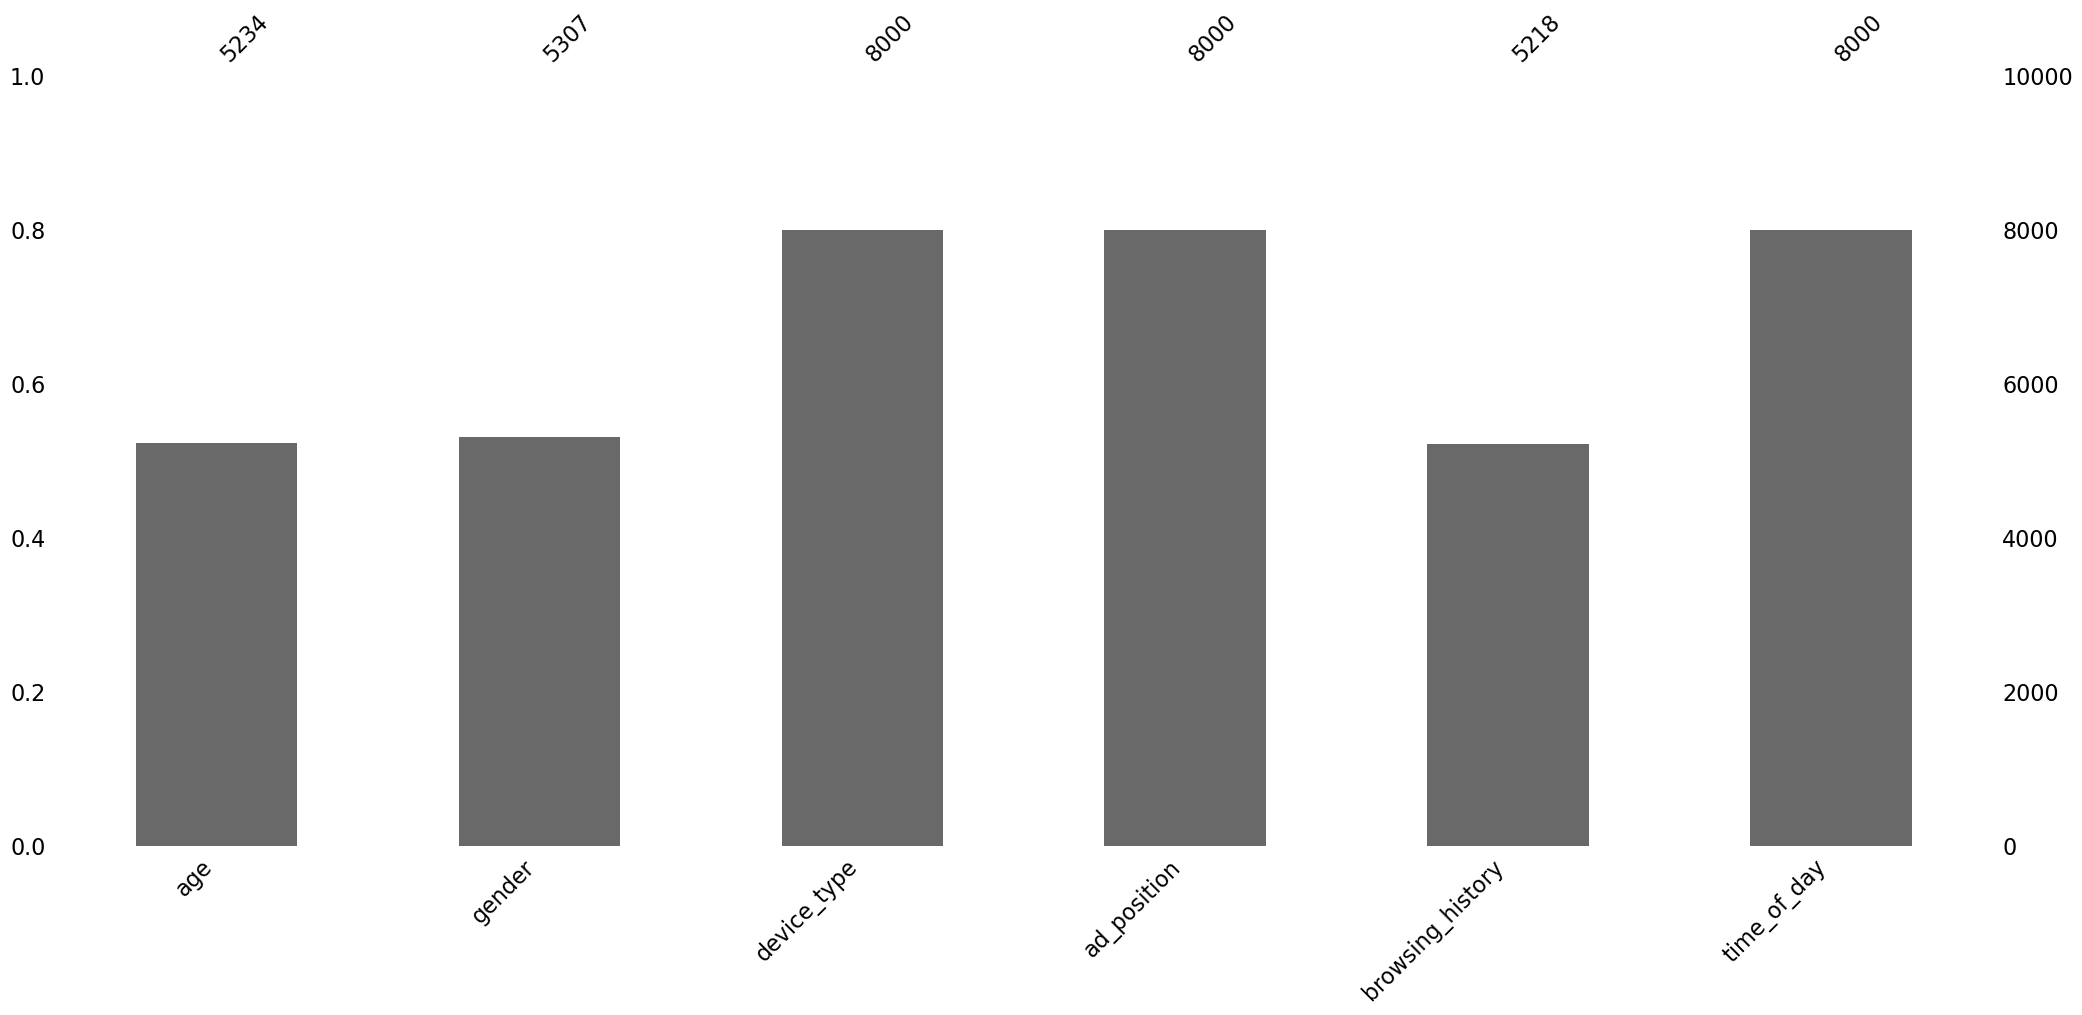

In [29]:
msno.bar(df_deger);

<Axes: >

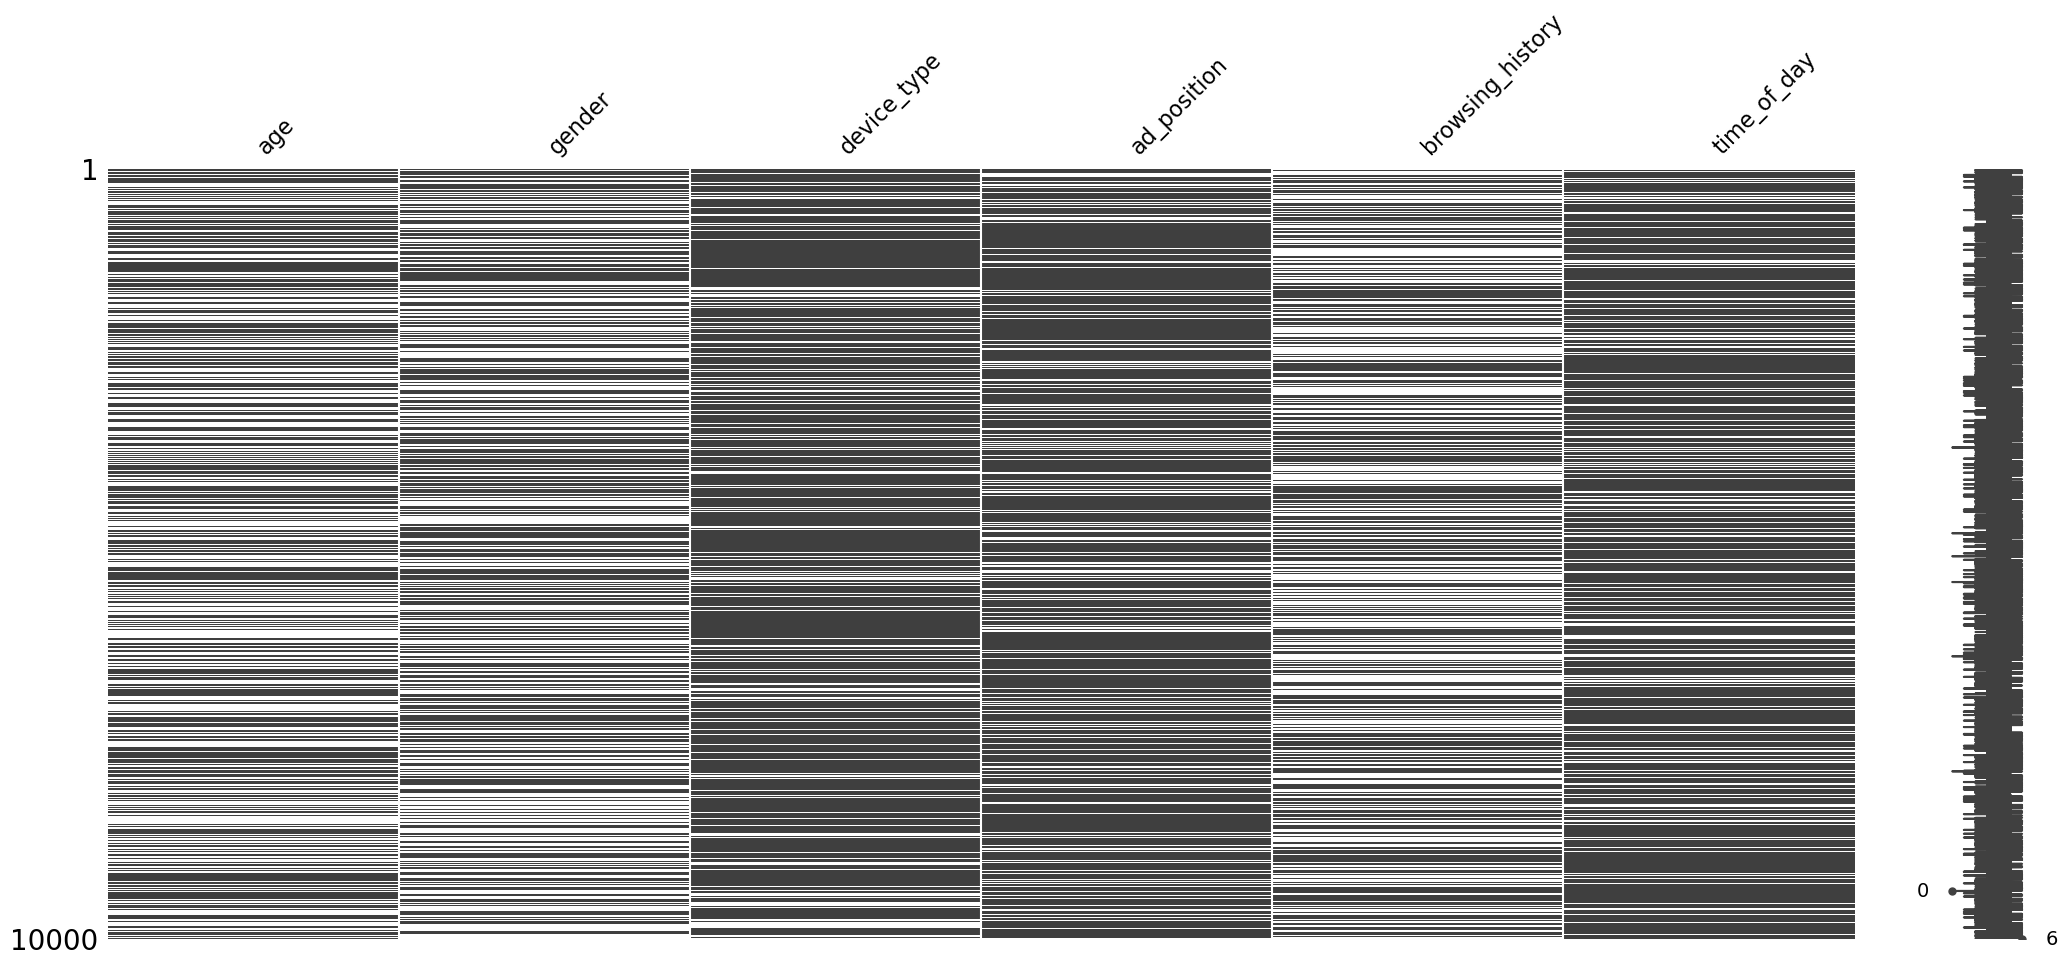

In [30]:
msno.matrix(df_deger)

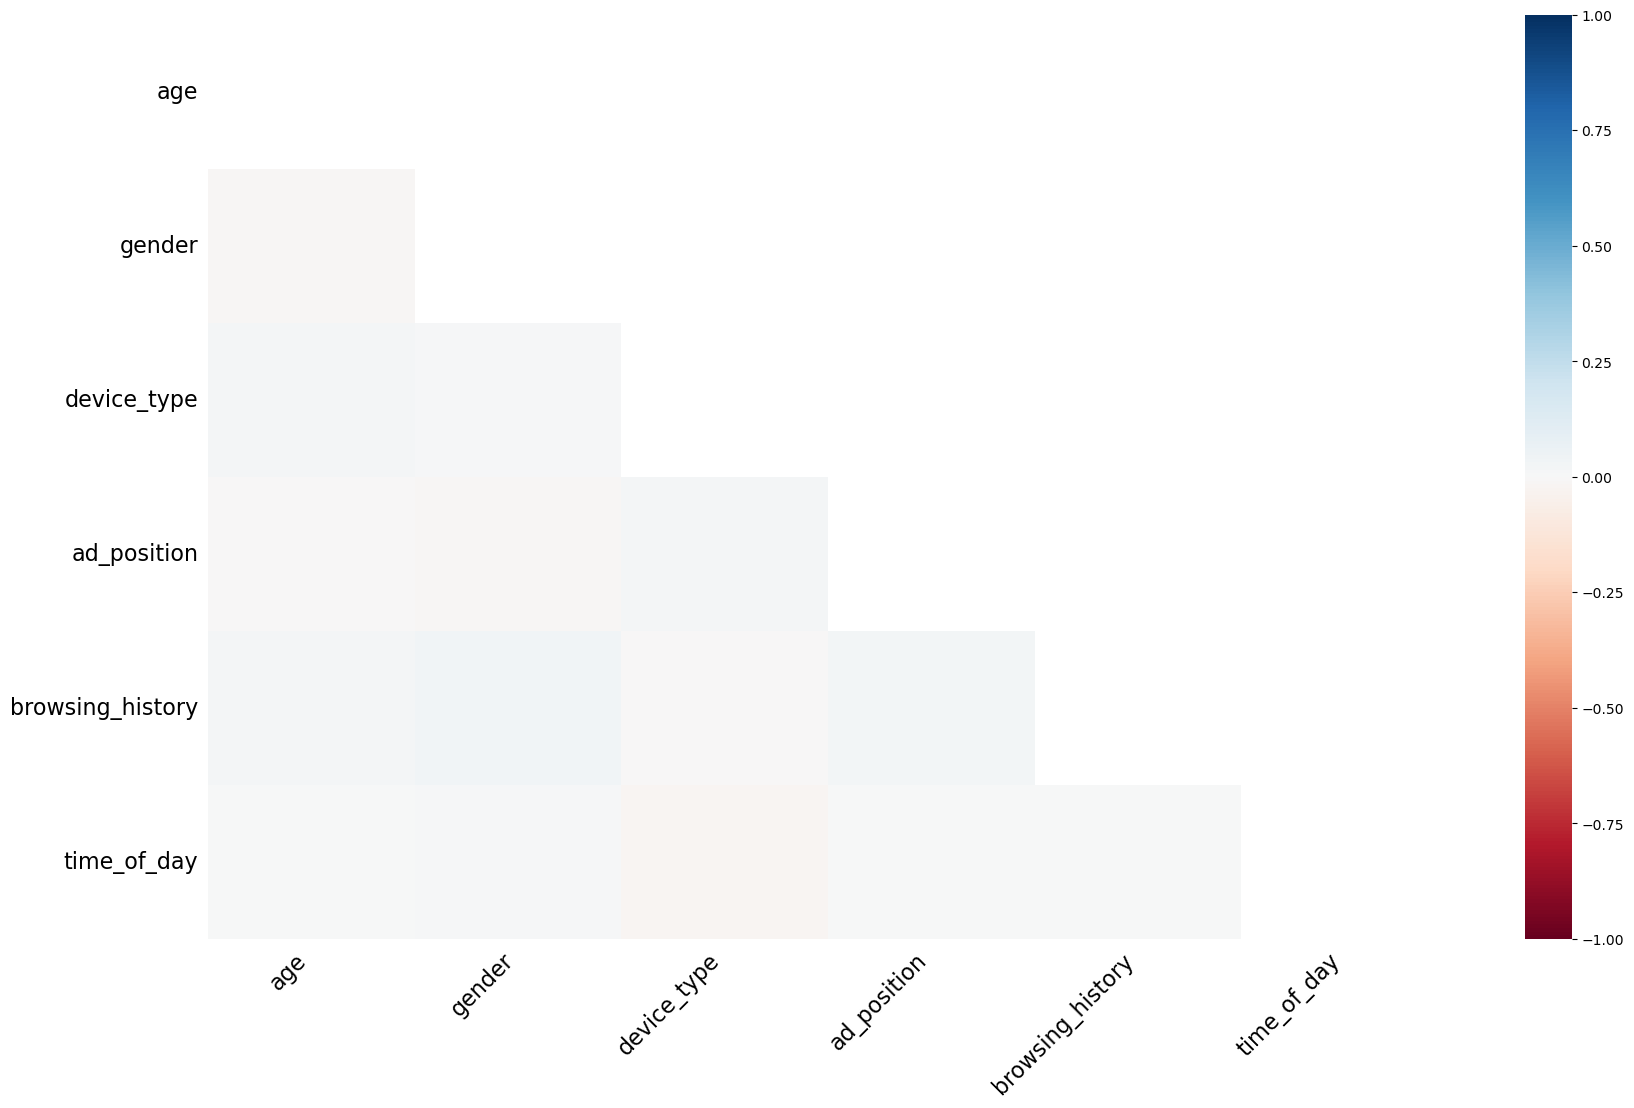

In [32]:
msno.heatmap(df_deger);

In [35]:
device_type	ad_position	browsing_history	time_of_day

SyntaxError: invalid syntax (2543205912.py, line 1)

In [38]:
df_one_hot2 = pd.get_dummies(df_deger, columns = ["device_type"], prefix = ["device_type"])

In [40]:
df_one_hot1 = pd.get_dummies(df_deger, columns = ["gender"], prefix = ["gender"])

In [42]:
df_one_hot3 = pd.get_dummies(df_deger, columns = ["ad_position"], prefix = ["ad_position"])

In [44]:
df_one_hot4 = pd.get_dummies(df_deger, columns = ["browsing_history"], prefix = ["browsing_history"])

In [46]:
df_one_hot5 = pd.get_dummies(df_deger, columns = ["time_of_day"], prefix = ["time_of_day"])

In [50]:
df_one_hot1.head()

,age,device_type,ad_position,browsing_history,time_of_day,gender_Female,gender_Male,gender_Non-Binary
0,22.0,Desktop,Top,Shopping,Afternoon,False,False,False
1,NaN,Desktop,Top,NaN,NaN,False,True,False
2,41.0,NaN,Side,Education,Night,False,False,True
3,34.0,NaN,NaN,Entertainment,Evening,False,True,False
4,39.0,NaN,NaN,Social Media,Morning,False,False,True


In [52]:
concatDeger = pd.concat([df_one_hot1, df_one_hot2, df_one_hot3, df_one_hot4, df_one_hot5],axis=1)

In [54]:
concatDeger.head()

,age,device_type,ad_position,browsing_history,time_of_day,gender_Female,gender_Male,gender_Non-Binary,age,gender,...,browsing_history_Social Media,age,gender,device_type,ad_position,browsing_history,time_of_day_Afternoon,time_of_day_Evening,time_of_day_Morning,time_of_day_Night
0,22.0,Desktop,Top,Shopping,Afternoon,False,False,False,22.0,NaN,...,False,22.0,NaN,Desktop,Top,Shopping,True,False,False,False
1,NaN,Desktop,Top,NaN,NaN,False,True,False,NaN,Male,...,False,NaN,Male,Desktop,Top,NaN,False,False,False,False
2,41.0,NaN,Side,Education,Night,False,False,True,41.0,Non-Binary,...,False,41.0,Non-Binary,NaN,Side,Education,False,False,False,True
3,34.0,NaN,NaN,Entertainment,Evening,False,True,False,34.0,Male,...,False,34.0,Male,NaN,NaN,Entertainment,False,True,False,False
4,39.0,NaN,NaN,Social Media,Morning,False,False,True,39.0,Non-Binary,...,True,39.0,Non-Binary,NaN,NaN,Social Media,False,False,True,False


In [56]:
concatDeger.isnull().sum()

age                               4766
device_type                       2000
ad_position                       2000
browsing_history                  4782
time_of_day                       2000
gender_Female                        0
gender_Male                          0
gender_Non-Binary                    0
age                               4766
gender                            4693
ad_position                       2000
browsing_history                  4782
time_of_day                       2000
device_type_Desktop                  0
device_type_Mobile                   0
device_type_Tablet                   0
age                               4766
gender                            4693
device_type                       2000
browsing_history                  4782
time_of_day                       2000
ad_position_Bottom                   0
ad_position_Side                     0
ad_position_Top                      0
age                               4766
gender                   

In [58]:
concatDeger.drop(columns=["age","gender","device_type","ad_position","time_of_day","browsing_history","id",]) 
concatDeger.isnull().sum()

KeyError: "['age' 'gender' 'device_type' 'ad_position' 'time_of_day'\n 'browsing_history' 'id'] not found in axis"

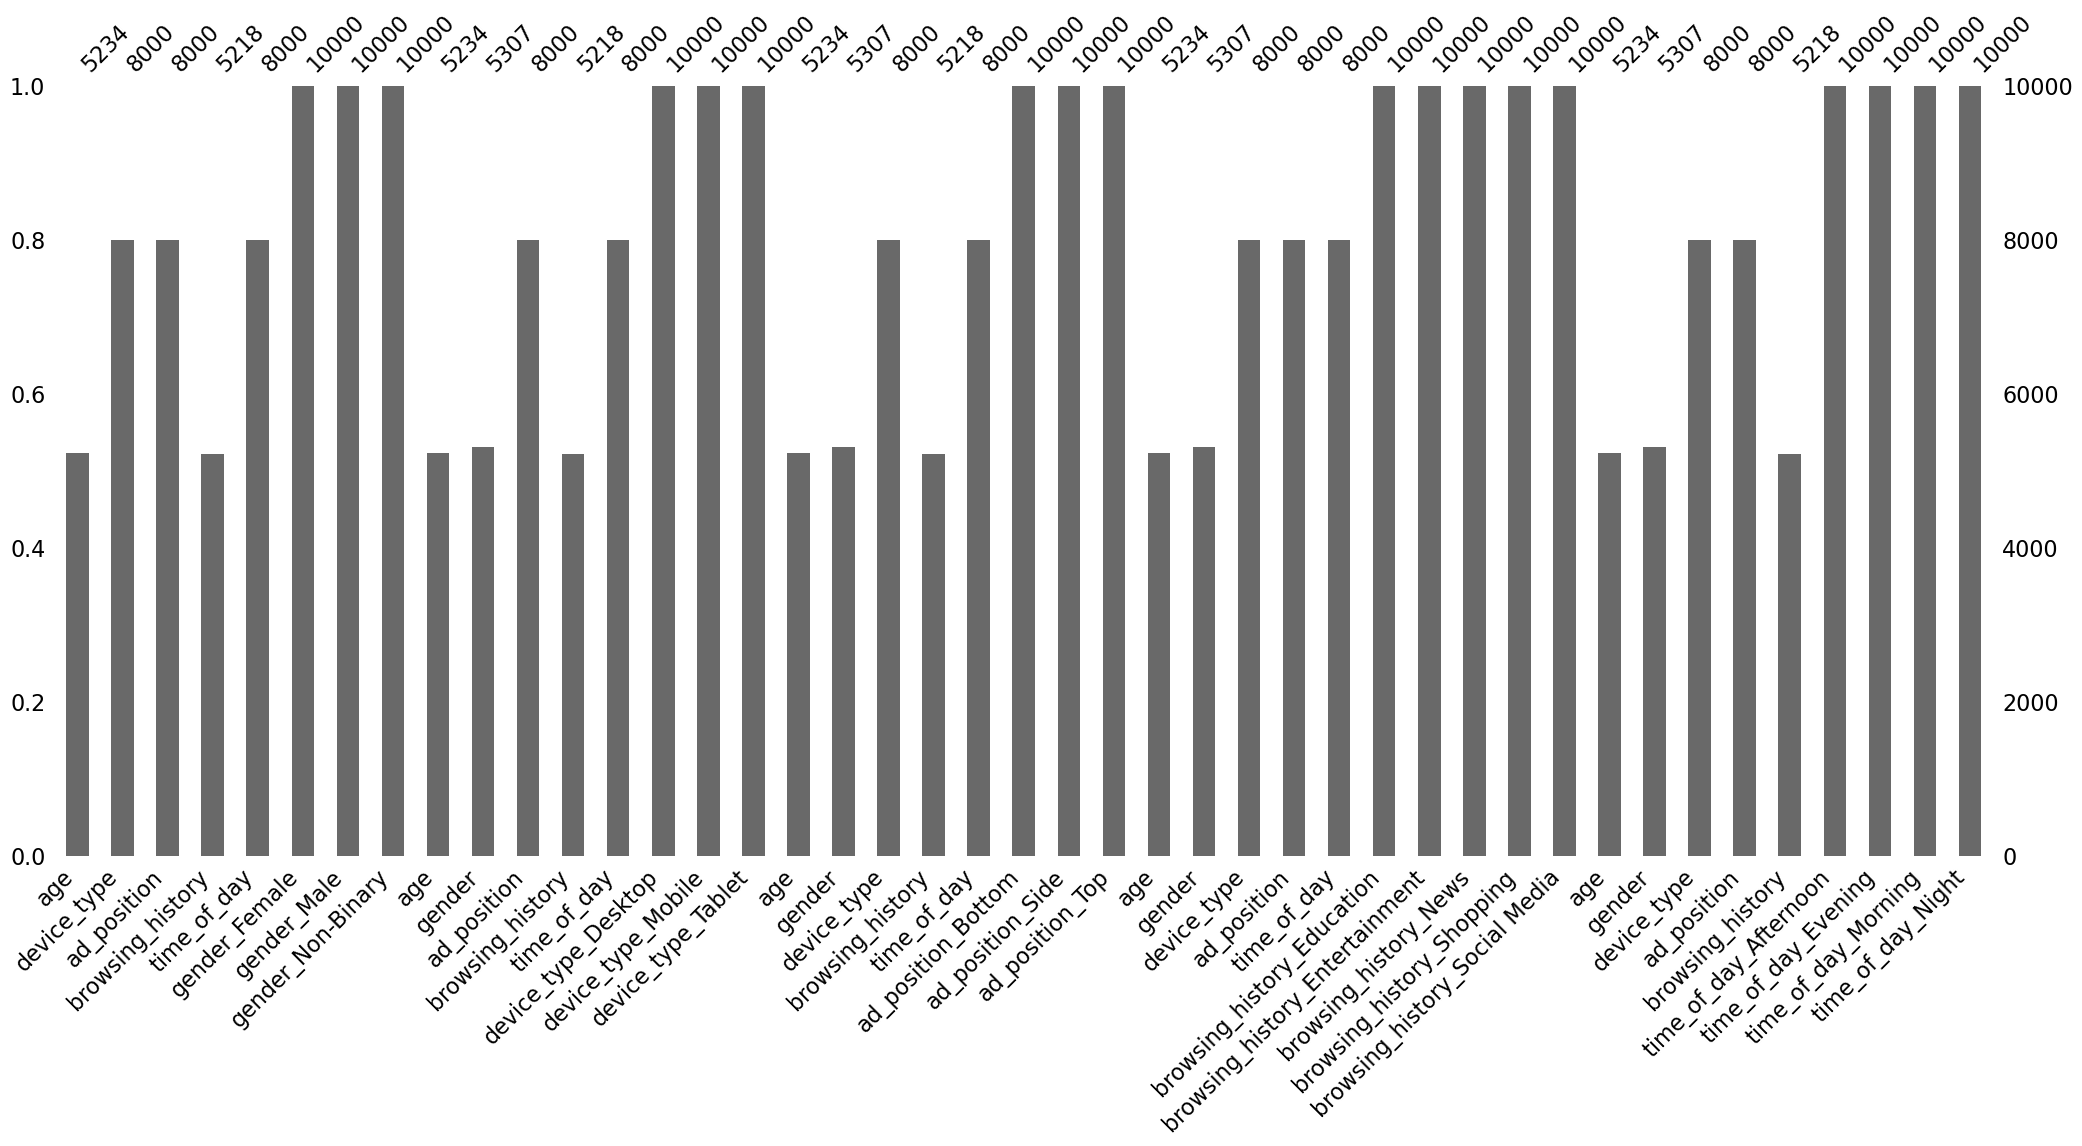

In [60]:
msno.bar(concatDeger);

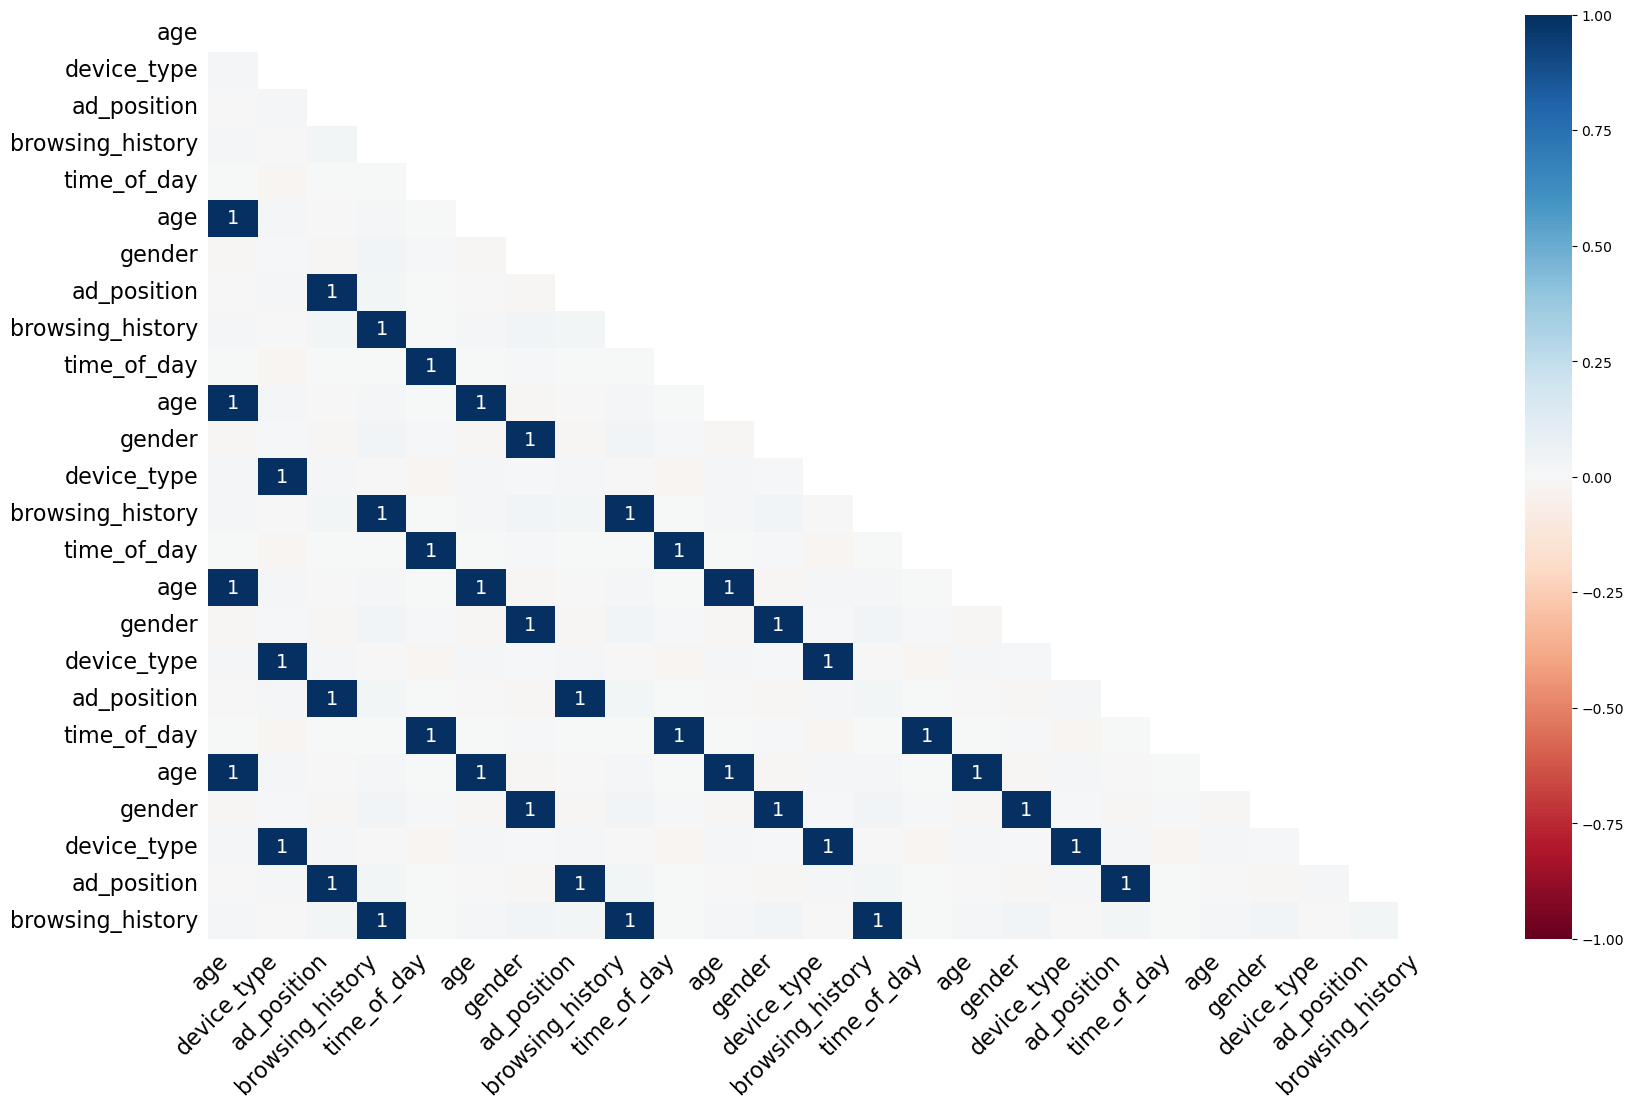

In [61]:
msno.heatmap(concatDeger);

In [89]:
concatDeger.notnull().sum()

age                                5234
device_type                        8000
ad_position                        8000
browsing_history                   5218
time_of_day                        8000
gender_Female                     10000
gender_Male                       10000
gender_Non-Binary                 10000
age                                5234
gender                             5307
ad_position                        8000
browsing_history                   5218
time_of_day                        8000
device_type_Desktop               10000
device_type_Mobile                10000
device_type_Tablet                10000
age                                5234
gender                             5307
device_type                        8000
browsing_history                   5218
time_of_day                        8000
ad_position_Bottom                10000
ad_position_Side                  10000
ad_position_Top                   10000
age                                5234


In [92]:
gender_Female                     10000
gender_Male                       10000
gender_Non-Binary
device_type_Desktop               10000
device_type_Mobile                10000
device_type_Tablet  
ad_position_Bottom                10000
ad_position_Side                  10000
ad_position_Top  
browsing_history_Education        10000
browsing_history_Entertainment    10000
browsing_history_News             10000
browsing_history_Shopping         10000
browsing_history_Social Media
time_of_day_Afternoon             10000
time_of_day_Evening               10000
time_of_day_Morning               10000
time_of_day_Night 

SyntaxError: invalid syntax (3906644198.py, line 1)

In [94]:
new_data_set =

SyntaxError: invalid syntax (3994673688.py, line 1)

In [64]:
Gender_set = pd.concat([gender_Female, gender_Male, gender_Non-Binary],axis=1)

NameError: name 'gender_Female' is not defined

In [66]:
df_one_hot2.head()

,age,gender,ad_position,browsing_history,time_of_day,device_type_Desktop,device_type_Mobile,device_type_Tablet
0,22.0,NaN,Top,Shopping,Afternoon,True,False,False
1,NaN,Male,Top,NaN,NaN,True,False,False
2,41.0,Non-Binary,Side,Education,Night,False,False,False
3,34.0,Male,NaN,Entertainment,Evening,False,False,False
4,39.0,Non-Binary,NaN,Social Media,Morning,False,False,False


In [118]:
deviceType = df_one_hot2.drop(columns=["age","gender","ad_position","time_of_day","browsing_history"]) 

In [285]:
Gen = df_one_hot1.drop(columns=["age","ad_position","time_of_day","browsing_history","device_type"]) 

In [122]:
adPosition = df_one_hot3.drop(columns=["age","time_of_day","browsing_history","device_type","gender"]) 

In [124]:
browsingHistory = df_one_hot4.drop(columns=["age","time_of_day","device_type","gender","ad_position"]) 

In [193]:
timeOfDay = df_one_hot5.drop(columns=["age","device_type","gender","ad_position","browsing_history"]) 

In [221]:
son = concatDeger.drop(columns=["deviceType","gender","adPosition","browsingHistory","timeOfDay",], axis=0 ) 

KeyError: "['deviceType' 'gender' 'adPosition' 'browsingHistory' 'timeOfDay'] not found in axis"

In [236]:
son = dfSon.concat(columns=["deviceType","Gender","adPosition","browsingHistory","timeOfDay",]) 

AttributeError: 'DataFrame' object has no attribute 'concat'

In [234]:
Gender

,gender_Female,gender_Male,gender_Non-Binary
0,False,False,False
1,False,True,False
2,False,False,True
3,False,True,False
4,False,False,True
...,...,...,...
9995,False,False,False
9996,True,False,False
9997,False,True,False
9998,False,False,False


In [287]:
son = pd.concat([Gen, deviceType, adPosition, browsingHistory, timeOfDay], axis=0)

In [318]:
son

,gender_Female,gender_Male,gender_Non-Binary,deviceType_Desktop,deviceType_Mobile,deviceType_Tablet,adPosition_Bottom,adPosition_Side,adPosition_Top,browsingHistory_Education,browsingHistory_Entertainment,browsingHistory_News,browsingHistory_Shopping,browsingHistory_Social Media,timeOfDay_Afternoon,timeOfDay_Evening,timeOfDay_Morning,timeOfDay_Night
0,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,False,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,False,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,False,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,False,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False
9996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False
9997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,True,False
9998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,True,False


In [316]:
son.isnull().count()

gender_Female                    50000
gender_Male                      50000
gender_Non-Binary                50000
deviceType_Desktop               50000
deviceType_Mobile                50000
deviceType_Tablet                50000
adPosition_Bottom                50000
adPosition_Side                  50000
adPosition_Top                   50000
browsingHistory_Education        50000
browsingHistory_Entertainment    50000
browsingHistory_News             50000
browsingHistory_Shopping         50000
browsingHistory_Social Media     50000
timeOfDay_Afternoon              50000
timeOfDay_Evening                50000
timeOfDay_Morning                50000
timeOfDay_Night                  50000
dtype: int64

UFuncTypeError: Cannot cast ufunc 'svd_n_s' input from dtype('O') to dtype('float64') with casting rule 'same_kind'

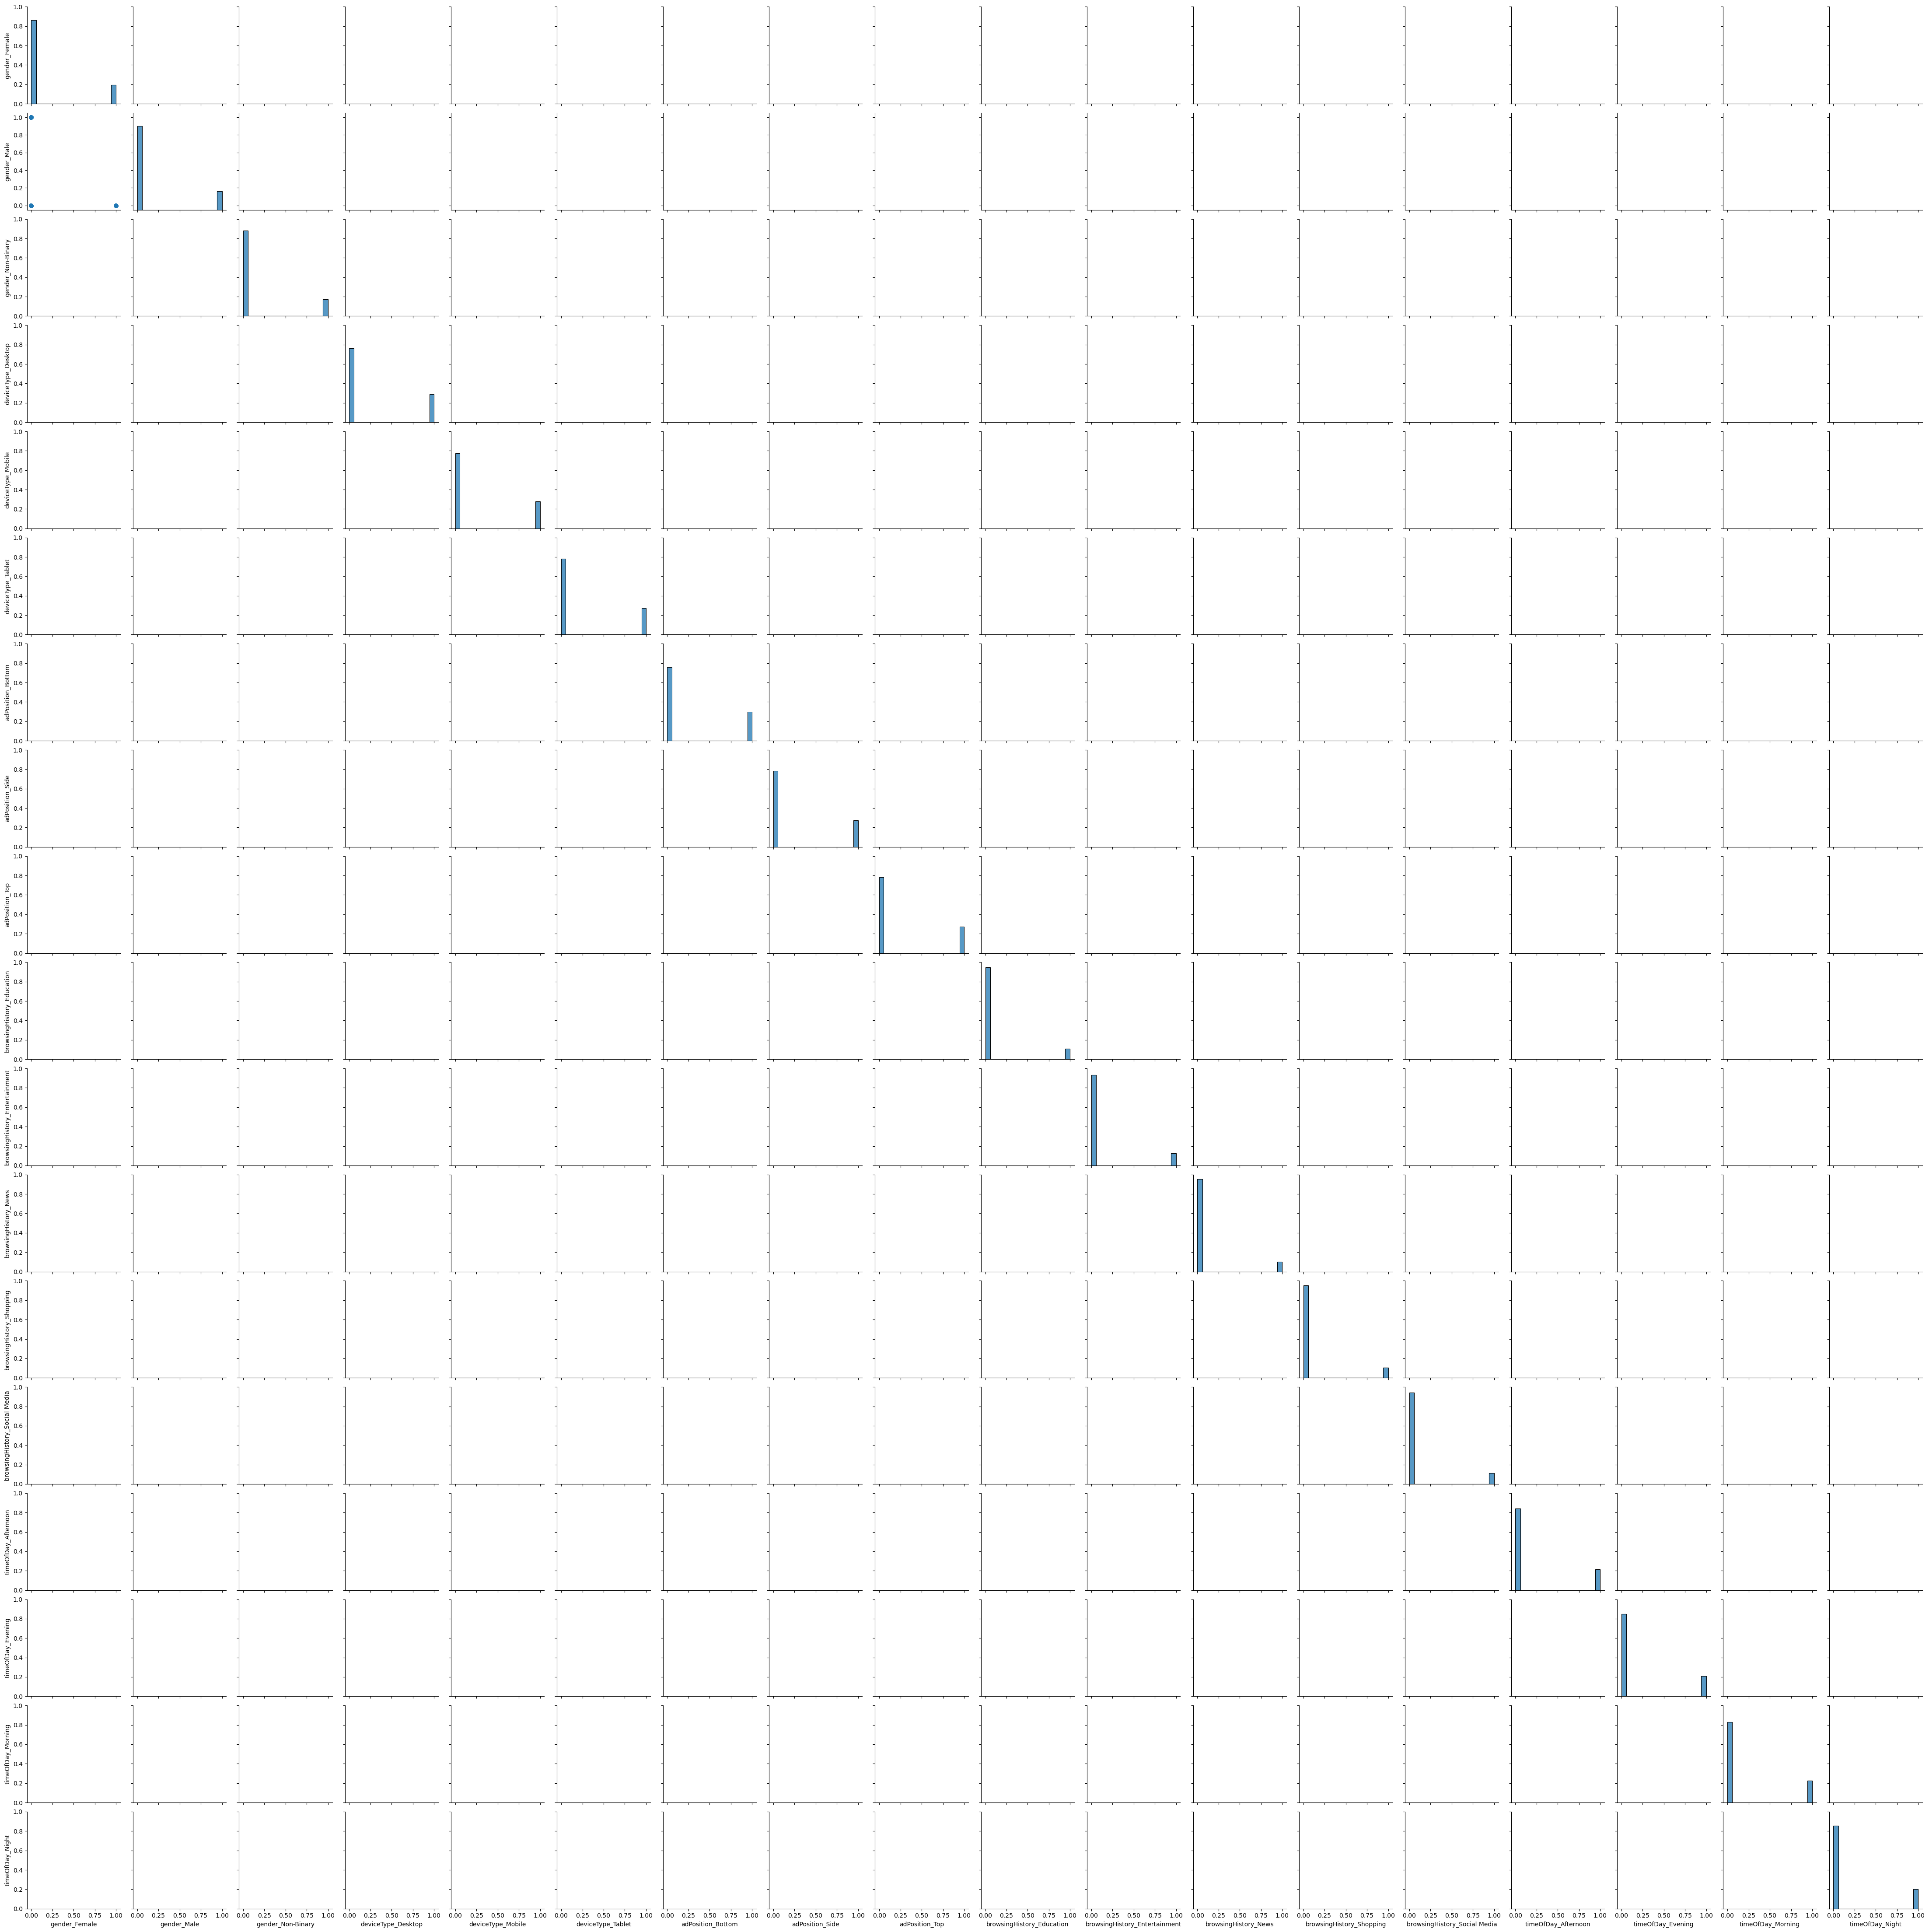

In [321]:
import seaborn as sns
sns.pairplot(son, kind  ="reg");

In [324]:
son.corr()

,gender_Female,gender_Male,gender_Non-Binary,deviceType_Desktop,deviceType_Mobile,deviceType_Tablet,adPosition_Bottom,adPosition_Side,adPosition_Top,browsingHistory_Education,browsingHistory_Entertainment,browsingHistory_News,browsingHistory_Shopping,browsingHistory_Social Media,timeOfDay_Afternoon,timeOfDay_Evening,timeOfDay_Morning,timeOfDay_Night
gender_Female,1.000000,-0.222788,-0.211659,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender_Male,-0.222788,1.000000,-0.209961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender_Non-Binary,-0.211659,-0.209961,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
deviceType_Desktop,NaN,NaN,NaN,1.000000,-0.370084,-0.365145,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
deviceType_Mobile,NaN,NaN,NaN,-0.370084,1.000000,-0.355549,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
deviceType_Tablet,NaN,NaN,NaN,-0.365145,-0.355549,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
adPosition_Bottom,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,-0.369852,-0.370913,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
adPosition_Side,NaN,NaN,NaN,NaN,NaN,NaN,-0.369852,1.000000,-0.349800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
adPosition_Top,NaN,NaN,NaN,NaN,NaN,NaN,-0.370913,-0.349800,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
browsingHistory_Education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,-0.123580,-0.111381,-0.111887,-0.116250,NaN,NaN,NaN,NaN
